## Question1-1

In [2]:
import numpy as np


def main():

    # -------- Constants ---------

    Z1 = 84
    Z2 = 2
    A1 = 214
    A2 = 4
    NucleonMass = 1.673e-24
    e = 4.803e-10
    hcut = 1.055e27
    Rnot = 1.2e-15  # in fm
    energy = 8.8e6  # eV
    energy = energy     

    vel = np.sqrt(2 * energy / A2 * NucleonMass)
    freq = Frequency(vel, Rnot, A1)
    rMass = ReducedMass(A1 * NucleonMass, A2 * NucleonMass)

    # -------- Calculation --------

    gFactor = GamowFactor(Z2, e, hcut, rMass, freq, vel=vel)
    print(f"The Gamow Factor is {gFactor}")

    lam = lambdaFunction(freq, gFactor)
    print(f"Lambda Value is {lam}")

    halfLife = 0.693 / lam
    print(f"The half life is {halfLife}")


def GamowFactor(
    Zdaughter: int, e: float, hcut: float, rMass: float, freq: float, vel: float
) -> float:

    gFactor = 2 * (np.pi) * Zdaughter * e**2 / (hcut * vel)
    gFactor = gFactor - ((4 * e / hcut) * np.sqrt(Zdaughter * freq))

    return gFactor


def lambdaFunction(freq, gFactor):
    lam = freq * np.exp(-2 * gFactor)
    return lam

    pass


# ------- UTILS --------


def Frequency(vel: float, Rnot: float, Ap: float) -> float:
    R = Rnot * Ap ** (1 / 3)
    return vel / R


def ReducedMass(mass1: float, mass2: float) -> float:

    return mass1 * mass2 / (mass1 + mass2)


if __name__ == "__main__":
    main()


The Gamow Factor is -1.582346079034384e-33
Lambda Value is 377997.10315483826
The half life is 1.8333473833954955e-06


## Question 1-2

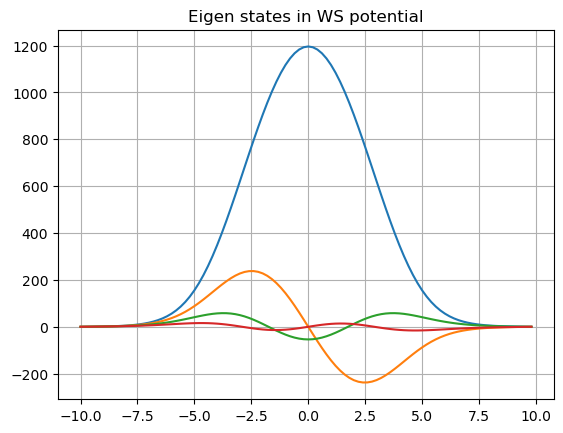

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h_cut = 197.327  # in MeV-fm
m = 938.272  # in MeV/c^2
V_0 = -38  # in MeV
L = 10  # in fm
h = (L - (-L)) / 100
x = np.arange(-L, L, h)
Z1 = np.empty(np.size(x))
Z2 = np.empty(np.size(x))
a = 0.5
R = 6

Z1[0] = 0
Z2[0] = 1.0


def WoodSaxon(d):
    return V_0 / (1 + np.exp(abs(d) - R) / a)


def func1(x, z1, z2):
    return z2


def func2(x, z1, z2, V, E):
    return (2 * m / h_cut**2) * (V - E) * z1


def rk4(x, Z1, Z2, function, e):
    for j in range(np.size(x) - 1):
        k_11 = h * func1(x[j], Z1[j], Z2[j])
        k_21 = h * func2(x[j], Z1[j], Z2[j], function(x[j]), e)

        k_12 = h * func1(x[j] + h / 2, Z1[j] + k_11 / 2, Z2[j] + k_21 / 2)
        k_22 = h * func2(
            x[j] + h / 2, Z1[j] + k_11 / 2, Z2[j] + k_21 / 2, function(x[j] + h / 2), e
        )

        k_13 = h * func1(x[j] + h / 2, Z1[j] + k_12 / 2, Z2[j] + k_22 / 2)
        k_23 = h * func2(
            x[j] + h / 2, Z1[j] + k_12 / 2, Z2[j] + k_22 / 2, function(x[j] + h / 2), e
        )

        k_14 = h * func1(x[j] + h, Z1[j] + k_13, Z2[j] + k_23)
        k_24 = h * func2(x[j] + h, Z1[j] + k_13, Z2[j] + k_23, function(x[j] + h), e)

        Z1[j + 1] = Z1[j] + (k_11 + 2 * (k_12 + k_13) + k_14) / 6
        Z2[j + 1] = Z2[j] + (k_21 + 2 * (k_22 + k_23) + k_24) / 6
    return Z1


def f(e):
    z = rk4(x, Z1, Z2, WoodSaxon, e)
    return z[-1]


def bisection(E_low, E_high, tol=1e-6, max_iter=100):
    if f(E_low) * f(E_high) > 0:
        return None
    iter_count = 0
    while abs(E_high - E_low) > tol and iter_count < max_iter:
        E_mid = (E_low + E_high) / 2
        f_mid = f(E_mid)

        if abs(f_mid) < tol:
            return E_mid

        if f(E_low) * f_mid < 0:
            E_high = E_mid
        else:
            E_low = E_mid

        iter_count += 1

    return (E_low + E_high) / 2


def find_eigenvalues(E_min, E_max, num_states, tol=1e-6):
    eigenvalues = []
    E_low = E_min
    step = (E_max - E_min) / (10000)

    while len(eigenvalues) < num_states and E_low < E_max:
        E_high = E_low + step

        if f(E_low) * f(E_high) < 0:
            eigen_energy = bisection(E_low, E_high, tol)
            if eigen_energy is not None:
                eigenvalues.append(eigen_energy)

        E_low = E_high

    return eigenvalues


E_min = -50
E_max = 50
num_states = 4
eigenvalues = find_eigenvalues(E_min, E_max, num_states)

for en in eigenvalues:
    Z = rk4(x, Z1, Z2, WoodSaxon, en)
    plt.plot(x, Z)
plt.title("Eigen states in WS potential")
plt.grid()
plt.savefig("Wood-Saxon.png")
plt.show()


## Question Number 2

In [ ]:
"""

This is for p shell

"""

import numpy as np
from sympy.physics.quantum.cg import CG
from sympy import S


def delta(a, b):
    return 1.0 if a == b else 0.0


def calculate_tbme(ja, jb, jc, jd, la, lb, lc, ld):
    A_T = 1.0
    na, nb, nc, nd = 1, 1, 1, 1  # Assuming p-shell or sd-shell occupancy

    J1_range = range(int(abs(ja - jb)), int(ja + jb + 1))
    J2_range = range(int(abs(jc - jd)), int(jc + jd + 1))
    common_J_values = list(set(J1_range) & set(J2_range))

    results = {}

    for J in common_J_values:
        for T in [0, 1]:
            if (ja == jb or jc == jd) and (J + T) % 2 == 0:
                continue  # Skip if J+T is even for identical particles

            term1 = (
                (-1) ** (na + nb + nc + nd)
                * (A_T / (2 * (2 * J + 1)))
                * np.sqrt(
                    (2 * ja + 1)
                    * (2 * jb + 1)
                    * (2 * jc + 1)
                    * (2 * jd + 1)
                    / ((1 + delta(ja, jb)) * (1 + delta(jc, jd)))
                )
            )

            term2 = (
                (-1) ** (jb + jd + lb + ld)
                * CG(S(jb), S(-0.5), S(ja), S(0.5), J, 0).doit().evalf()
                * CG(S(jd), S(-0.5), S(jc), S(0.5), J, 0).doit().evalf()
                * (1 - (-1) ** (la + lb + J + T))
            )

            term3 = (
                CG(S(jb), S(0.5), S(ja), S(0.5), J, 1).doit().evalf()
                * CG(S(jd), S(0.5), S(jc), S(0.5), J, 1).doit().evalf()
                * (1 + (-1) ** (T))
            )

            results[(J, T)] = term1 * (term2 - term3)

    return results


# Define p-shell quantum numbers
p_shell = [(1 / 2, 1), (3 / 2, 1)]  # (j, l)

# Calculate and print TBME for p-shell
print("\033[1mTBME for p-shell:\033[0m")

calculated_pairs = set()

for ja, la in p_shell:
    for jb, lb in p_shell:
        for jc, lc in p_shell:
            for jd, ld in p_shell:
                # Add conditions for interchanged pairs
                pair1 = tuple(sorted([(ja, jb), (jc, jd)]))
                pair2 = tuple(sorted([(jc, jd), (ja, jb)]))
                pair3 = tuple(sorted([(jb, ja), (jc, jd)]))
                pair4 = tuple(sorted([(ja, jb), (jd, jc)]))
                pair5 = tuple(sorted([(jb, ja), (jd, jc)]))

                if (
                    pair1 not in calculated_pairs
                    and pair2 not in calculated_pairs
                    and pair3 not in calculated_pairs
                    and pair4 not in calculated_pairs
                    and pair5 not in calculated_pairs
                ):

                    results = calculate_tbme(ja, jb, jc, jd, la, lb, lc, ld)
                    print(f"<ja={ja},jb={jb}|V|jc={jc},jd={jd}>:")
                    for (J, T), result in results.items():
                        print(f"  J={J}, T={T}: {result:.6f}")
                    calculated_pairs.add(pair1)


TBME for p-shell:
<ja=0.5,jb=0.5|V|jc=0.5,jd=0.5>:
  J=0, T=1: -1.000000
  J=1, T=0: -1.000000
<ja=0.5,jb=0.5|V|jc=0.5,jd=1.5>:
  J=1, T=0: -0.000000
<ja=0.5,jb=0.5|V|jc=1.5,jd=1.5>:
  J=0, T=1: -1.414214
  J=1, T=0: 0.632456
<ja=0.5,jb=1.5|V|jc=0.5,jd=1.5>:
  J=1, T=0: -2.000000
  J=1, T=1: 0.000000
  J=2, T=0: -1.200000
  J=2, T=1: -0.800000
<ja=0.5,jb=1.5|V|jc=1.5,jd=1.5>:
  J=1, T=0: -1.264911
  J=2, T=1: 0.565685
<ja=1.5,jb=1.5|V|jc=1.5,jd=1.5>:
  J=0, T=1: -2.000000
  J=1, T=0: -1.200000
  J=2, T=1: -0.400000
  J=3, T=0: -1.200000


In [18]:
import numpy as np
from sympy.physics.quantum.cg import CG
from sympy import S

def delta(a, b):
    return 1.0 if a == b else 0.0

def calculate_tbme(ja, jb, jc, jd, la, lb, lc, ld):

    A_T = 1.0
    na, nb, nc, nd = 0, 0, 0, 0  # Assuming p-shell occupancy (l=1)

    J1_range = range(int(abs(ja - jb)), int(ja + jb + 1))
    J2_range = range(int(abs(jc - jd)), int(jc + jd + 1))
    common_J_values = list(set(J1_range) & set(J2_range))

    results = {}

    for J in common_J_values:
        for T in [0, 1]:
            if (ja == jb or jc == jd) and (J + T) % 2 == 0:
                continue  # Skip if J+T is even for identical particles

            term1 = (-1)**(na + nb + nc + nd) * (A_T / (2 * (2 * J + 1))) * \
                    np.sqrt((2 * ja + 1) * (2 * jb + 1) * (2 * jc + 1) * (2 * jd + 1) /
                            ((1 + delta(ja, jb)) * (1 + delta(jc, jd))))

            term2 = (-1)**(jb + jd + lb + ld) * \
                    CG(S(jb), S(-0.5), S(ja), S(0.5), J, 0).doit().evalf() * \
                    CG(S(jd), S(-0.5), S(jc), S(0.5), J, 0).doit().evalf() * \
                    (1 - (-1)**(la + lb + J + T))

            term3 = CG(S(jb), S(0.5), S(ja), S(0.5), J, 1).doit().evalf() * \
                    CG(S(jd), S(0.5), S(jc), S(0.5), J, 1).doit().evalf() * \
                    (1 + (-1)**(T))

            results[(J, T)] = term1 * (term2 - term3)

    return results

# Define p-shell quantum numbers (j, l)
p_shell = [(1/2, 1), (3/2, 1)]

# Calculate and print TBME for p-shell
print("\033[1mTBME for p-shell:\033[0m")

calculated_pairs = set()
j0_tbme_values = {}

for ja, la in p_shell:
    for jb, lb in p_shell:
        for jc, lc in p_shell:
            for jd, ld in p_shell:
                # Add conditions for interchanged pairs
                pair1 = tuple(sorted([(ja, jb), (jc, jd)]))
                pair2 = tuple(sorted([(jc, jd), (ja, jb)]))
                pair3 = tuple(sorted([(jb, ja), (jc, jd)]))
                pair4 = tuple(sorted([(ja, jb), (jd, jc)]))
                pair5 = tuple(sorted([(jb, ja), (jd, jc)]))

                if (pair1 not in calculated_pairs and
                    pair2 not in calculated_pairs and
                    pair3 not in calculated_pairs and
                    pair4 not in calculated_pairs and
                    pair5 not in calculated_pairs):

                    results = calculate_tbme(ja, jb, jc, jd, la, lb, lc, ld)
                    print(f"<ja={ja},jb={jb}|V|jc={jc},jd={jd}>:")
                    for (J, T), result in results.items():
                        print(f"  J={J}, T={T}: {result:.6f}")
                        if J == 0:
                            j0_tbme_values[(ja, jb, jc, jd, T)] = result
                    calculated_pairs.add(pair1)

print("\n\033[1mTBME for J=0:\033[0m")
for (ja, jb, jc, jd, T), value in j0_tbme_values.items():
    print(f"<ja={ja},jb={jb}|V|jc={jc},jd={jd}>, T={T}: {value:.6f}")

# --- Extraction of J=0 TBME values for 6He Hamiltonian ---
print("\n\033[1mJ=0, T=1 TBME values for 6He Hamiltonian:\033[0m")

V_11 = j0_tbme_values.get((3/2, 3/2, 3/2, 3/2, 1), 0.0)
V_12 = j0_tbme_values.get((3/2, 3/2, 1/2, 1/2, 1), 0.0)
V_22 = j0_tbme_values.get((1/2, 1/2, 1/2, 1/2, 1), 0.0)

# Construct the Hamiltonian matrix for 6He ground state (J=0, T=1)
E1 = float(input("Enter the single-particle energy for p3/2 (E1): "))
E2 = float(input("Enter the single-particle energy for p1/2 (E2): "))

hamiltonian_matrix = np.array([
    [V_11 + 2 * E1, V_12],
    [V_12, V_22 + 2 * E2]
])

print("\n\033[1mHamiltonian Matrix for 6He (J=0, T=1):\033[0m")
print(hamiltonian_matrix)

# Calculate eigenvalues
eigenvalues, _ = np.linalg.eig(hamiltonian_matrix)

print("\n\033[1mGround State Energy (Lowest Eigenvalue):\033[0m")
print(f"{np.min(eigenvalues):.6f}")


TBME for p-shell:
<ja=0.5,jb=0.5|V|jc=0.5,jd=0.5>:
  J=0, T=1: -1.000000
  J=1, T=0: -1.000000
<ja=0.5,jb=0.5|V|jc=0.5,jd=1.5>:
  J=1, T=0: -0.000000
<ja=0.5,jb=0.5|V|jc=1.5,jd=1.5>:
  J=0, T=1: -1.414214
  J=1, T=0: 0.632456
<ja=0.5,jb=1.5|V|jc=0.5,jd=1.5>:
  J=1, T=0: -2.000000
  J=1, T=1: 0.000000
  J=2, T=0: -1.200000
  J=2, T=1: -0.800000
<ja=0.5,jb=1.5|V|jc=1.5,jd=1.5>:
  J=1, T=0: -1.264911
  J=2, T=1: 0.565685
<ja=1.5,jb=1.5|V|jc=1.5,jd=1.5>:
  J=0, T=1: -2.000000
  J=1, T=0: -1.200000
  J=2, T=1: -0.400000
  J=3, T=0: -1.200000

TBME for J=0:
<ja=0.5,jb=0.5|V|jc=0.5,jd=0.5>, T=1: -1.000000
<ja=0.5,jb=0.5|V|jc=1.5,jd=1.5>, T=1: -1.414214
<ja=1.5,jb=1.5|V|jc=1.5,jd=1.5>, T=1: -2.000000

J=0, T=1 TBME values for 6He Hamiltonian:

Hamiltonian Matrix for 6He (J=0, T=1):
[[-2.00000000000000 0.0]
 [0.0 15.0000000000000]]


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Question Number 3

[1.5]
[2.2835080920897473, 2.6134798453944352]
[2.499698734307773]
[3.0570591941753777, 3.3852609136617247, 3.6502500587030173]
[3.241139092972037, 3.6847644069014165]
[3.4649596925461967]
[3.8170495229842465, 4.1529306760252505, 4.38734183679771, 4.758942745134336]
[3.9697742198631474, 4.430198381346954, 4.652336309888369]
[4.16725083662691, 4.718692673497119]
[4.395782874715272]


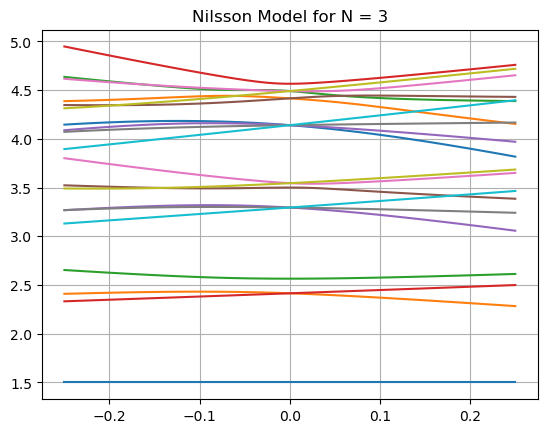

In [14]:
from math import factorial
import numpy as np
from matplotlib import pyplot as plt

# --------- Utils ---------

fact = lambda x: factorial(int(x))
sqrt = lambda x: np.sqrt(abs(x)) * np.sign(x)

delta = lambda x, y: int(x == y)

A = 84
kappa = 0.05
mu = [0.35]
fdelta = lambda delta: ((1 + (2 / 3) * delta) ** 2 * (1 - (4 / 3) * delta)) ** (-1 / 6)
hw0 = 1
hw00_func = lambda delta: hw0 / fdelta(delta)
C_func = lambda hw: -2 * kappa * hw
D_func = lambda C: [C * m / 2 for m in mu]
N = 3


F1 = lambda j1, j2, j3, m1, m2, m3: sqrt(
    fact(j1 + j2 - j3)
    * fact(j3 + j1 - j2)
    * fact(j2 + j3 - j1)
    * (2 * j3 + 1)
    / fact(j1 + j2 + j3 + 1)
)
F2 = lambda j1, j2, j3, m1, m2, m3: sqrt(
    fact(j3 + m3)
    * fact(j3 - m3)
    * fact(j2 + m2)
    * fact(j2 - m2)
    * fact(j1 + m1)
    * fact(j1 - m1)
)


def F3(j1, j2, j3, m1, m2, m3):
    smax = min(j1 - m1, j2 + m2, j1 + j2 - j3)
    smin = abs(min(min(j3 - j2 + m1, j3 - j1 - m2), 0))
    ans = 0
    for s in np.arange(smin, smax + 1):
        ans += (-1) ** s / (
            fact(j1 - m1 - s)
            * fact(j2 + m2 - s)
            * fact(j3 - j2 + m1 + s)
            * fact(j3 - j1 - m2 + s)
            * fact(j1 + j2 - j3 - s)
            * fact(s)
        )
    return ans


def CG(j1, j2, j3, m1, m2, m3):
    if not m1 + m2 == m3:
        return 0
    if abs(m1) > j1 or abs(m2) > j2 or abs(m3) > j3:
        return 0
    if j3 > j1 + j2 or j3 < abs(j1 - j2):
        return 0
    else:
        return (
            F1(j1, j2, j3, m1, m2, m3)
            * F2(j1, j2, j3, m1, m2, m3)
            * F3(j1, j2, j3, m1, m2, m3)
        )


# --------- Nilsson ----------


def shell_basis(N, omega):
    if omega - 0.5 > N:
        raise Exception("Omega exceeds N+0.5")
    basis_set = []
    for l in range(N, -1, -2):
        for lam in range(-l, l + 1):
            sigma = omega - lam
            if sigma == 0.5 or sigma == -0.5:
                basis_set.append([l, lam, sigma])
    return basis_set


def nilsson_hamiltonian(Number, omega, deltaf):
    hw00 = hw00_func(deltaf)
    C = C_func(hw00)
    D = D_func(C)
    basis = shell_basis(Number, omega)
    dim = len(basis)
    H = np.zeros((dim, dim))
    for i, a in enumerate(basis):
        for j, b in enumerate(basis):
            la, lb = a[0], b[0]
            lama, lamb = a[1], b[1]
            siga, sigb = a[2], b[2]
            if i == j:
                H[i, j] += hw0 * (Number + 1.5) + D[0] * la * (la + 1)
            H[i, j] += (
                C
                * (
                    0.5
                    * sqrt((la - lamb) * (la + lamb + 1))
                    * delta(lama, lamb + 1)
                    * delta(siga, sigb - 1)
                    + 0.5
                    * sqrt((la + lamb) * (la - lamb + 1))
                    * delta(lama, lamb - 1)
                    * delta(siga, sigb + 1)
                    + lama * siga * delta(lama, lamb) * delta(siga, sigb)
                )
                * delta(la, lb)
            )
            ex_r2 = (
                sqrt((Number - lb + 2) * (Number + lb + 1)) * delta(la, lb - 2)
                + sqrt((Number - lb) * (Number + lb + 3)) * delta(la, lb + 2)
                + (Number + 1.5) * delta(la, lb)
            )
            ex_Y = (
                sqrt((2 * lb + 1) / (2 * la + 1))
                * CG(lb, 2, la, lamb, 0, lama)
                * CG(lb, 2, la, 0, 0, 0)
            )
            H[i, j] += (
                -deltaf
                * hw0
                * (2 / 3)
                * ex_r2
                * ex_Y
                * delta(lama, lamb)
                * delta(siga, sigb)
            )
    return H


def plot_energy(N, omega, deltafs):

    Es = np.zeros((deltafs.shape[0], len(shell_basis(N, omega))))
    for i, deltaf in enumerate(deltafs):
        H = nilsson_hamiltonian(N, omega, deltaf)
        E = np.linalg.eigvalsh(H)
        E = sorted(E)
        Es[i, :] = E
    print(E)
    plt.plot(deltafs, Es)


plt.figure()
deltafs = np.linspace(-0.25, 0.25, 100)
for N in range(N + 1):
    for o in range(N + 1):
        omega = o + 0.5
        plot_energy(N, omega, deltafs)
plt.grid()
plt.title("Nilsson Model for N = 3")
plt.savefig("Nilsson.png")
plt.show()


## Question Number 4

<function matplotlib.pyplot.show(close=None, block=None)>

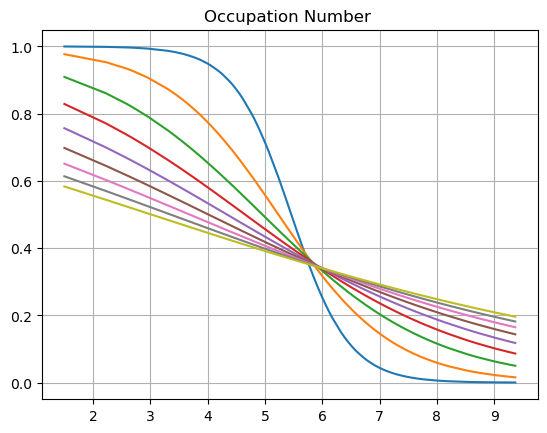

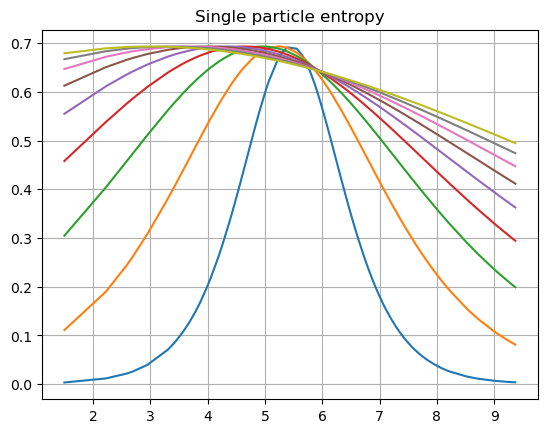

In [ ]:
from math import factorial
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import newton
from math import sqrt as squareroot

fact = lambda x: factorial(int(x))
sqrt = lambda x: squareroot(abs(x)) * np.sign(x)

F1 = lambda j1, j2, j3, m1, m2, m3: sqrt(
    fact(j1 + j2 - j3)
    * fact(j3 + j1 - j2)
    * fact(j2 + j3 - j1)
    * (2 * j3 + 1)
    / fact(j1 + j2 + j3 + 1)
)
F2 = lambda j1, j2, j3, m1, m2, m3: sqrt(
    fact(j3 + m3)
    * fact(j3 - m3)
    * fact(j2 + m2)
    * fact(j2 - m2)
    * fact(j1 + m1)
    * fact(j1 - m1)
)


def F3(j1, j2, j3, m1, m2, m3):
    smax = min(j1 - m1, j2 + m2, j1 + j2 - j3)
    smin = abs(min(min(j3 - j2 + m1, j3 - j1 - m2), 0))
    ans = 0
    for s in np.arange(smin, smax + 1):
        ans += (-1) ** s / (
            fact(j1 - m1 - s)
            * fact(j2 + m2 - s)
            * fact(j3 - j2 + m1 + s)
            * fact(j3 - j1 - m2 + s)
            * fact(j1 + j2 - j3 - s)
            * fact(s)
        )
    return ans


def CG(j1, j2, j3, m1, m2, m3):
    if not m1 + m2 == m3:
        return 0
    if abs(m1) > j1 or abs(m2) > j2 or abs(m3) > j3:
        return 0
    if j3 > j1 + j2 or j3 < abs(j1 - j2):
        return 0
    else:
        return (
            F1(j1, j2, j3, m1, m2, m3)
            * F2(j1, j2, j3, m1, m2, m3)
            * F3(j1, j2, j3, m1, m2, m3)
        )


delta = lambda x, y: int(x == y)

A = 84
kappa = 0.05
mu = [0, 0, 0, 0.35, 0.625, 0.63, 0.448, 0.434]
fdelta = lambda delta: ((1 + (2 / 3) * delta) ** 2 * (1 - (4 / 3) * delta)) ** (-1 / 6)
hw0 = 1
hw00_func = lambda delta: hw0 / fdelta(delta)
C_func = lambda hw: -2 * kappa * hw
D_func = lambda C: [C * m / 2 for m in mu]


def shell_basis(N, omega):
    if omega - 0.5 > N:
        raise Exception("Omega exceeds N+0.5")
    basis_set = []
    for l in range(N, -1, -2):
        for lam in range(-l, l + 1):
            sigma = omega - lam
            if sigma == 0.5 or sigma == -0.5:
                basis_set.append([l, lam, sigma])
    return basis_set


def hamiltonian(N, omega, deltaf):
    hw00 = hw00_func(deltaf)
    C = C_func(hw00)
    D = D_func(C)
    basis = shell_basis(N, omega)
    dim = len(basis)
    H = np.zeros((dim, dim))
    for i, a in enumerate(basis):
        for j, b in enumerate(basis):
            la, lb = a[0], b[0]
            lama, lamb = a[1], b[1]
            siga, sigb = a[2], b[2]
            if i == j:
                H[i, j] += hw0 * (N + 1.5) + D[N] * la * (la + 1)
            H[i, j] += (
                C
                * (
                    0.5
                    * sqrt((la - lamb) * (la + lamb + 1))
                    * delta(lama, lamb + 1)
                    * delta(siga, sigb - 1)
                    + 0.5
                    * sqrt((la + lamb) * (la - lamb + 1))
                    * delta(lama, lamb - 1)
                    * delta(siga, sigb + 1)
                    + lama * siga * delta(lama, lamb) * delta(siga, sigb)
                )
                * delta(la, lb)
            )
            ex_r2 = (
                sqrt((N - lb + 2) * (N + lb + 1)) * delta(la, lb - 2)
                + sqrt((N - lb) * (N + lb + 3)) * delta(la, lb + 2)
                + (N + 1.5) * delta(la, lb)
            )
            ex_Y = (
                sqrt((2 * lb + 1) / (2 * la + 1))
                * CG(lb, 2, la, lamb, 0, lama)
                * CG(lb, 2, la, 0, 0, 0)
            )
            H[i, j] += (
                -deltaf
                * hw0
                * (2 / 3)
                * ex_r2
                * ex_Y
                * delta(lama, lamb)
                * delta(siga, sigb)
            )
    return H


N_max = 7
Np = 40
temps = np.arange(0.5, 5.0, 0.5)


def energies(N_max, deltaf=0.4):
    Es = []
    for N in range(N_max + 1):
        for o in range(N + 1):
            omega = o + 0.5
            H = hamiltonian(N, omega, deltaf)
            E = np.linalg.eigvalsh(H)
            Es.extend(E)
    return np.array(sorted(Es))


fd = lambda E, lam, kT: 1 / (1 + np.exp((E - lam) / kT))


def conservation(lam, Es, kT, Np):
    return Np - np.sum(fd(Es, lam, kT))


Ef = lambda Es, kT, Np: newton(conservation, x0=4, args=(Es, kT, Np))

plt.figure()
for kT in temps:
    Es = energies(N_max)
    lam = Ef(Es, kT, Np)
    ni = fd(Es, lam, kT)
    plt.plot(Es, ni)
plt.grid()
plt.savefig("Occupation.png")
plt.title("Occupation Number ")
plt.show

plt.figure()
for kT in temps:
    Es = energies(N_max)
    lam = Ef(Es, kT, Np)
    ni = fd(Es, lam, kT)
    si = -(ni * np.log(ni) + (1 - ni) * np.log(1 - ni))
    plt.plot(Es, si)
plt.grid()
plt.title("Single particle entropy")
plt.savefig("SEP_entropy.png")
plt.show

## Quiz

In [17]:
"""

This is the code for the quiz of quadrapole moment and magentic moment.

Since there will never be contribution from gnL thus we can ignore that term

"""


def main() -> None:

    # Constants
    j = 3 / 2
    gl = 1
    gs = 5.585

    num = int(input("Enter a mass number for Lithium \n"))

    radius = rad(num)
    quad = quadrapole(radius, j)
    print(f"The quadrapole moment is {quad}")

    magmo = magneticMoment(j, gl, gs)
    print(f"The magnetic moment is {magmo}")


def rad(num: float) -> float:
    radius = (3 / 5) * ((1.2 * num ** (1 / 3)) ** 2)
    return radius


def quadrapole(radius: float, j: float) -> float:

    quad = -((2 * j - 1) / (2 * (j + 1))) * radius
    return quad


def magneticMoment(j: float, gl: float, gs: float) -> float:

    magMoment = (j - 0.5) * gl + 0.5 * gs

    return magMoment


if __name__ == "__main__":
    main()


The quadrapole moment is -1.2646560533839388
The magnetic moment is 3.7925
